1. 기본 라이브러리 호출

우선 필요한 라이브러리를 호출합니다. 각 라이브러리는 다음과 같습니다.

In [4]:
# 케라스 모델 형성
from keras.models import Sequential
from keras.utils import np_utils 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten

# 훈련 데이터셋에서 검증 데이터셋
from sklearn.model_selection import train_test_split

# 데이터 분석
import pandas as pd
import numpy as np

2. 데이터 받기

read_csv를 이용하여 입력받습니다

In [5]:
train = pd.read_csv('C:/Users/1/python/MNIST/train.csv')
labels = train.iloc[:,0].values.astype('float32')

X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('C:/Users/1/python/MNIST/test.csv').values).astype('float32')

각 값의 레이블은 to_categocial을 활용하여 범주화 시킵니다.

In [6]:
y_train = np_utils.to_categorical(labels)

이미지는 28 by 28 pixel이고 흑백 채널 1개 이므로 다음과 같이 reshape을 해줍니다.

In [7]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

이제 훈련 데이터를 이용해 검증 데이터셋을 만들어 보겠습니다.

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

3. 데이터 전처리

데이터의 스케일을 조정합니다. np.max 대신 255를 사용해도 됩니다.

In [9]:
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean =np.std(X_train)
X_train -= mean
X_test -= mean

4. 모델 구성

모델을 쌓아줍니다. layer를 계속 쌓아서 만들 수 있습니다.

모델에서 사용하는 layer의 종류는 총 5개입니다.

- Conv2D : Convolution Layer입니다. 이미지 처리에서 자주 사용하는 층입니다. 지역 패턴을 학습합니다.
- MaxPooling2D : MaxPooling Layer입니다. 다운 샘플링합니다. 가중치 개수를 줄이고, 공간 특성 학습에 유용합니다.
- DropOut : 무작위로 네트워크를 생략합니다. 이를 통해 과적합을 예방할 수 있습니다.
- Flatten : 지금까지 텐서를 하나로 펴는 과정입니다.
- Dense : 완전 연결 층입니다. 전역 패턴을 학습합니다.

활성화 함수는 2종류로 사용합니다

- relu : 주로 은닉층에 사용됩니다.
- softmax : 다중 클래스 분류 출력층에서 사용됩니다.

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

5. 모델 컴파일 및 훈련'

5.1 컴파일

컴파일에서는 총 3가지를 지정합니다.

1. 옵티마이저는 RMSprop 옵티마이저를 사용합니다. 경사하강법보다 빠른 방법입니다.
2. 손실함수는 Categorical_crossentropy를 사용합니다, 두 확률 분포 사이의 거리를 측정하고 확률 분포 사이의 거리를 최소화하고최적화 합니다.
3. 측정지표는 accuracy, 즉 정확도로 지정합니다.

5.2 훈련

검증 셋을 만드는 방법은 다양합니다. train_test_split을 사용할 수 있습니다.

In [12]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, batch_size=64, validation_data=(X_val, y_val))

print("훈련데이터 점수 : ", model.evaluate(X_train, y_train))
print("검증데이터 점수 : ", model.evaluate(X_val, y_val))

Epoch 1/20
591/591 [==============================] - 28s 46ms/step - loss: 0.4335 - accuracy: 0.8576 - val_loss: 14.0591 - val_accuracy: 0.9729
Epoch 2/20
591/591 [==============================] - 29s 49ms/step - loss: 0.0643 - accuracy: 0.9806 - val_loss: 12.8725 - val_accuracy: 0.9819
Epoch 3/20
591/591 [==============================] - 31s 52ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 11.9222 - val_accuracy: 0.9774
Epoch 4/20
591/591 [==============================] - 30s 51ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 7.3671 - val_accuracy: 0.9871
Epoch 5/20
591/591 [==============================] - 30s 51ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 22.4789 - val_accuracy: 0.9733
Epoch 6/20
591/591 [==============================] - 31s 53ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 25.6267 - val_accuracy: 0.9762
Epoch 7/20
591/591 [==============================] - 31s 53ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 22.9164 - val_acc

6. 훈련 결과 시각화

fit 함수의 리턴 값은 속성 4가지입니다.

- acc : 훈련 정확도
- loss : 훈련 손실값
- val_acc : 검증 손실값
- val_loss : 검증 정확도

matplot을 활용하여 그래프를 그립니다.

각각은 loss와 accuracy에 관한 그래프 입니다.

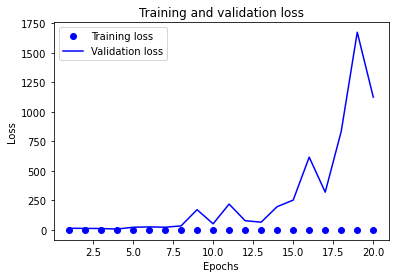

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

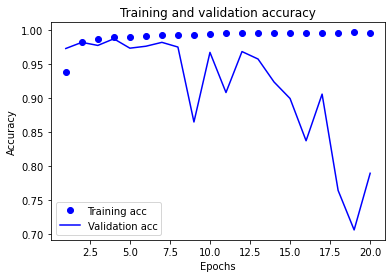

In [17]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

검증 데이터셋이 작아서 그런지, 아니면 층이 복잡해서 과적합이 비교적 빨리 일어나는 것 같습니다. 무시하고 제출해보겠습니다.

7. 예측 및 제출

마지막 제출용 csv파일을 만드는 방법은 사람마다 다른 것 같습니다. 프랑소와 숄레님은 함수로 만들어서 다음과 같이 마지막 제출 파일을 만들어서 가져와봤습니다.

In [18]:
preds = model.predict_classes(X_test, verbose=0)

def write_preds(preds, fname) :
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index = False, header = True)

write_preds(preds, "keras-mnist.csv")

C:\Users\1\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
